In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np

In [61]:
# Write the spectra we're interested in downloading to txt file

seyferts = pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/seyferts.csv').head(10)
file = '/Users/kciurleo/Documents/kciurleo/AGN/csvs/SDSS.txt'

with open(file, 'w') as f:
    for i in range(len(seyferts)):
        row = seyferts.iloc[i]
        f.write(f"{int(row['PLATE']):04d}/spec-{int(row['PLATE']):04d}-{int(row['MJD']):04d}-{int(row['FIBERID']):04d}.fits\n")




In [79]:
#more interesting guys
#let's figure out how many "good" chandra objects we have
final_min_abs = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_min_abs_full.csv')
final_full = pd.read_csv('/opt/pwdata/katie/csc2.1/final_data/final_info_full.csv')
#Find all the guys for which all the chandra observations are less than 100 or 300 counts
low_count_names=[]
high_count_names=[]
for i in range(len(final_min_abs['CXO name'].unique())):
    name=final_min_abs['CXO name'].unique()[i]

    df=final_full.loc[final_full['CXO name']==name]
    if (df['counts'] < 300).all():
        low_count_names.append(name)
    else:
        high_count_names.append(name)

low_count = final_min_abs.loc[final_min_abs['CXO name'].isin(low_count_names)]
high_count = final_min_abs.loc[final_min_abs['CXO name'].isin(high_count_names)]

In [87]:
high_count_names_full = high_count.merge(csc21, how='left', left_on='CXO name', right_on='CSC21P_name').drop_duplicates(['MJD','FIBERID','PLATE'])
high_count_names_full[['MJD','PLATE','FIBERID', '# ObsID', 'CXO name']]



,MJD,PLATE,FIBERID,# ObsID,CXO name
0,51788.0,401.0,129.0,13959,2CXO J014209.0-005050
1,54139.0,2419.0,442.0,5626,2CXO J080421.3+100611
2,55999.0,5320.0,175.0,2095,2CXO J095010.7+142000
6,56041.0,5888.0,477.0,3149,2CXO J110241.2+180329
10,56066.0,5992.0,251.0,5527b,2CXO J130852.2+212819
34,52443.0,915.0,429.0,9557,2CXO J140052.5-014511
37,52797.0,1323.0,13.0,934,2CXO J140354.3+542209
244,52674.0,1160.0,313.0,13863,2CXO J140829.2+562823
245,51996.0,540.0,549.0,5671,2CXO J151215.7+020315


In [93]:
special_high_count_guys=high_count_names_full[high_count_names_full['MJD'].isin([55999, 56041, 56066])]
special_high_count_guys

,# ObsID,unabsorbed,model,Cstat,nH,nH error plus,nH error minus,gamma,gamma error plus,gamma error minus,...,mjd_first,mjd_last,n_detections,confused,high_background,XMM_ra,XMM_dec,CHANDRA_OBSID,OBSDATE,TIME
2,2095,True,main,529.881862,0.001364,0.016277,NaN,1.695552,0.084893,0.084893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2095,2001-06-03,13.8
6,3149,True,main,829.291504,0.002336,NaN,NaN,1.916895,0.014800,0.014800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3149,2002-03-08,39.2
10,5527b,True,res,1653.139307,0.000000,0.008621,NaN,1.900000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731,2000-06-24,9.5


In [118]:
final_min_abs.loc[final_min_abs['MJD']=='52705']

Index(['# ObsID', 'unabsorbed', 'model', 'Cstat', 'nH', 'nH error plus',
       'nH error minus', 'gamma', 'gamma error plus', 'gamma error minus',
       '0.3-7.5 flux', 'xflux error plus', 'xflux_error_minus', '2-10 flux',
       'flux210 error plus', 'flux210 error minus', 'Soft flux',
       'fluxsoft error plus', 'fluxsoft error minus', 'Medium flux',
       'fluxmed error plus', 'fluxmed error minus', 'Hard flux',
       'fluxhard error plus', 'fluxhard error minus', 'Sum flux',
       'fluxsum error plus', 'fluxsum error minus', 'Test Statistic', 'Ce',
       'Cv', 'CXO name', 'RA', 'Dec', 'Z', 'galactic nH', 'counts',
       'luminosity', 'luminosity error', 'Flux_OIII_5006',
       'Flux_OIII_5006_err', 'Fx/F[OIII]', 'Fx/F[OIII].1', 'compton thick'],
      dtype='object')

In [127]:
unabsobs.loc[unabsobs['MJD']==52705]

,# ObsID,unabsorbed,model,Cstat,nH,nH error plus,nH error minus,gamma,gamma error plus,gamma error minus,...,ra_2,dec_2,IAUstripped,MJD,FIBERID,PLATE,CSC21P_name,CHANDRA_OBSID,OBSDATE,TIME
4,20889,True,ERROR,700.486729,0.000179,NaN,NaN,-0.797123,NaN,NaN,...,121.395863,24.163962,J080534.9+240950,52705.0,158.0,1265.0,2CXO J080534.9+240950,20889,2017-12-21,32.7


In [3]:
# Write the spectra we're interested in downloading to txt file, just the ones that are triply unabsorbed and unobserved with XMM

unabsunobs = pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/unobserved_full_info.csv')
unabsobs = pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/ALL_observed_full_info.csv')
csc21=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/obsids_seyferts.csv', low_memory=False)

# Merge the two tables
unabsunobs = unabsunobs.merge(csc21, how='left', left_on='CXO name', right_on='CSC21P_name').drop_duplicates(['MJD','FIBERID','PLATE'])
unabsobs = unabsobs.drop_duplicates(subset=['MJD','FIBERID','PLATE'])
#These are the hand picked guys to download using DR17 instead
unabsunobs_filtered = unabsunobs[unabsunobs['MJD'].isin([56041, 55649, 56748])]

file = '/Users/kciurleo/Documents/kciurleo/AGN/csvs/SDSS.txt'

importantman=csc21.loc[csc21['CSC21P_name']=='2CXO J173801.1+583012'][['MJD','PLATE','FIBERID']]

lowcounts=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/low_count_unobserved.csv').drop_duplicates(['MJD','FIBERID','PLATE'])
lowcounts_filtered = lowcounts[lowcounts['FIBERID'].isin([936,579,361,933,204,723,460,944,666,561])]

need_download=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/optical_spectra_needed.csv')
#For DR17 use

with open(file, 'w') as f:
    for id, row in need_download.iterrows():
        f.write(f"{int(row['PLATE']):04d}/spec-{int(row['PLATE']):04d}-{int(row['MJD']):04d}-{int(row['FIBERID']):04d}.fits\n")
'''
#For DR7 use
with open(file, 'w') as f:
    for id, row in need_download.iterrows():
        f.write(f"1d_26/{int(row['PLATE']):04d}/1d/spSpec-{int(row['MJD']):04d}-{int(row['PLATE']):04d}-{int(row['FIBERID']):03d}.fit\n")

'''

'\n#For DR7 use\nwith open(file, \'w\') as f:\n    for id, row in need_download.iterrows():\n        f.write(f"1d_26/{int(row[\'PLATE\']):04d}/1d/spSpec-{int(row[\'MJD\']):04d}-{int(row[\'PLATE\']):04d}-{int(row[\'FIBERID\']):03d}.fit\n")\n\n'

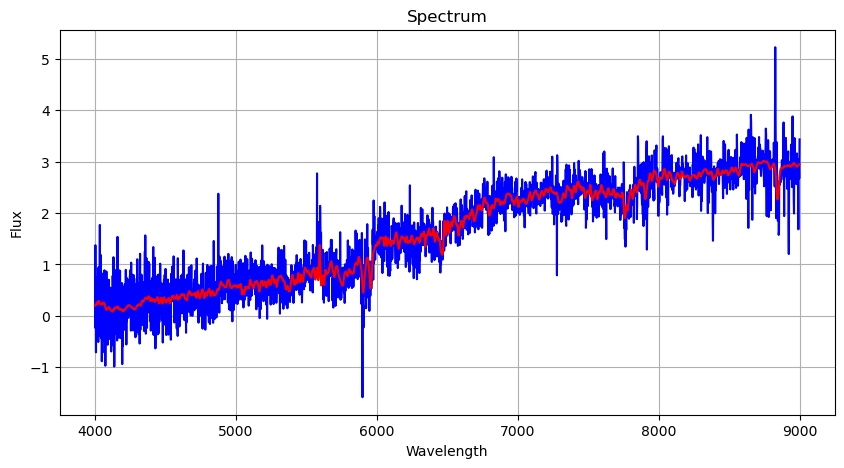

In [4]:
#  Read in fits
folder=5992
#file=glob.glob(f'/opt/pwdata/katie/xmm_proposal/not_triples/DR17/full/{folder}/*')[0]
file=glob.glob(f'/opt/pwdata/katie/xmm_proposal/not_triples/high_count_chandra_guys/full/{folder}/*')[0]
#file=glob.glob(f'/opt/pwdata/katie/xmm_proposal/not_triples/observed_DR17/full/{folder}/*')[0]
file='/opt/pwdata/katie/SDSS/DR17/spec-3864-55649-0723.fits'
hdul = fits.open(file, ignore_missing_simple=True)
spectrum_data = hdul[1].data
header = hdul[1].header
hdul.close()

flux = spectrum_data['FLUX'].flatten()
wavelength = 10**spectrum_data['loglam'].flatten()

mask = np.logical_and(wavelength > 4000, wavelength < 9000)

#Plot
plt.figure(figsize=(10, 5))
plt.plot(wavelength[mask], flux[mask], linestyle='-', color='b')
#plt.plot(wavelength[mask], flux[mask]-spectrum_data['model'].flatten()[mask], linestyle='-', color='r')
plt.plot(wavelength[mask], spectrum_data['model'].flatten()[mask], linestyle='-', color='r')
#plt.yscale('log')
plt.title('Spectrum')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
#plt.xlim(6000,7000)
#plt.xlim(5200,6000)
#plt.xlim(7500,9000)
#plt.ylim(0,8)
plt.grid(True)
plt.show()

In [14]:
file='/Users/kciurleo/Downloads/kc01_resid.fits'
hdul = fits.open(file, ignore_missing_simple=True)
spectrum_data = hdul[0].data
header = hdul[0].header
header


SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 2961 / Axis length                                    
EXTEND  =                    T / File may contain extensions                    
DATAMIN =           0.000000E0 / Minimum data value                             
DATAMAX =           0.000000E0 / Maximum data value                             
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2025-01-02T06:41:19' / Date FITS file was generated                  
IRAF-TLM= '2025-01-02T06:43:36' / Time of last modification                     
TAI     =        4579502212.13 / 1st row - Number of seconds since Nov 17 1858  
RA      =            168.05956 / 1st row - Right ascension of telescope boresigh
DEC     =            41.3886

In [102]:
unobserved=pd.read_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/ALL_unobserved_full_info.csv')

In [103]:
#interesting s2 guys as certified by ed

mjd = np.array([51959, 52338, 52669, 52943, 53062, 53172, 53433, 53794, 54178, 54555, 53003])
plate = np.array([550, 850, 1198, 1584, 1372, 1645, 2027, 2217, 2122, 1814, 1439])
fiberid = np.array([139, 585, 392, 567, 61, 251, 412, 488, 143, 323, 101])


In [106]:
new_df=pd.DataFrame(columns=unobserved.columns)
for i in range(len(mjd)):
    mjdi=mjd[i]
    platei=plate[i]
    fiberidi=fiberid[i]

    # Filter unobserved DataFrame for the current MJD, PLATE, and FIBERID
    interest = unobserved[(unobserved['MJD'] == mjdi) & 
                          (unobserved['PLATE'] == platei) & 
                          (unobserved['FIBERID'] == fiberidi)]
    
    # Concatenate the filtered results to new_df
    new_df = pd.concat([new_df, interest], ignore_index=True)

new_df.to_csv('/Users/kciurleo/Documents/kciurleo/AGN/csvs/xmm_proposal_s2s.csv', index=False)

/var/folders/k6/tsv820sn5p716ph672hyrv8c004djp/T/ipykernel_66295/2158033988.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, interest], ignore_index=True)
